In [3]:
import sys, time, os, asyncio, glob
import numpy as np
import pandas as pd
from astropy.time import Time, TimeDelta
from lsst_efd_client import EfdClient
from lsst.sitcom.vandv.efd import create_efd_client

In [4]:
# Create an EFD client
client = create_efd_client()

In [5]:
# make a list of all different topics that you can query in the EFD
await client.get_topics()

['lsst.sal.ATAOS.ackcmd',
 'lsst.sal.ATAOS.command_disable',
 'lsst.sal.ATAOS.command_disableCorrection',
 'lsst.sal.ATAOS.command_enable',
 'lsst.sal.ATAOS.command_enableCorrection',
 'lsst.sal.ATAOS.command_exitControl',
 'lsst.sal.ATAOS.command_offset',
 'lsst.sal.ATAOS.command_resetOffset',
 'lsst.sal.ATAOS.command_setLogLevel',
 'lsst.sal.ATAOS.command_standby',
 'lsst.sal.ATAOS.command_start',
 'lsst.sal.ATAOS.logevent_appliedSettingsMatchStart',
 'lsst.sal.ATAOS.logevent_atspectrographCorrectionCompleted',
 'lsst.sal.ATAOS.logevent_atspectrographCorrectionStarted',
 'lsst.sal.ATAOS.logevent_authList',
 'lsst.sal.ATAOS.logevent_configurationApplied',
 'lsst.sal.ATAOS.logevent_configurationsAvailable',
 'lsst.sal.ATAOS.logevent_correctionEnabled',
 'lsst.sal.ATAOS.logevent_correctionOffsets',
 'lsst.sal.ATAOS.logevent_detailedState',
 'lsst.sal.ATAOS.logevent_errorCode',
 'lsst.sal.ATAOS.logevent_focusOffsetSummary',
 'lsst.sal.ATAOS.logevent_heartbeat',
 'lsst.sal.ATAOS.logevent_

In [6]:
# make a list of all topics in the EFD related to MTMount
topics = await client.get_topics()
for topic in topics:
    if 'MTMount' in topic:
        print(topic)

lsst.sal.MTMount.ackcmd
lsst.sal.MTMount.auxiliaryBoxes
lsst.sal.MTMount.azimuth
lsst.sal.MTMount.azimuthCableWrap
lsst.sal.MTMount.azimuthDrives
lsst.sal.MTMount.azimuthDrivesThermal
lsst.sal.MTMount.balancing
lsst.sal.MTMount.cabinet0101
lsst.sal.MTMount.cameraCableWrap
lsst.sal.MTMount.command_disable
lsst.sal.MTMount.command_disableCameraCableWrapFollowing
lsst.sal.MTMount.command_enable
lsst.sal.MTMount.command_enableCameraCableWrapFollowing
lsst.sal.MTMount.command_exitControl
lsst.sal.MTMount.command_homeBothAxes
lsst.sal.MTMount.command_moveToTarget
lsst.sal.MTMount.command_setLogLevel
lsst.sal.MTMount.command_standby
lsst.sal.MTMount.command_start
lsst.sal.MTMount.command_startTracking
lsst.sal.MTMount.command_stop
lsst.sal.MTMount.command_stopTracking
lsst.sal.MTMount.command_trackTarget
lsst.sal.MTMount.compressedAir
lsst.sal.MTMount.cooling
lsst.sal.MTMount.deployablePlatforms
lsst.sal.MTMount.dynaleneCooling
lsst.sal.MTMount.elevation
lsst.sal.MTMount.elevationDrives
lsst.

In [7]:
# get all fields related to the MT Mount azimuth
await client.get_fields('lsst.sal.MTMount.azimuth')

['actualAcceleration',
 'actualPosition',
 'actualTorque',
 'actualVelocity',
 'demandPosition',
 'demandVelocity',
 'private_efdStamp',
 'private_identity',
 'private_kafkaStamp',
 'private_origin',
 'private_rcvStamp',
 'private_revCode',
 'private_seqNum',
 'private_sndStamp',
 'timestamp']

In [8]:
# get all azimuth position and timestamp data within a parcticular time range
start = Time("2023-03-10 03:00:00Z", scale='utc')
end = Time("2023-03-10 03:30:00Z", scale='utc')
az = await client.select_time_series('lsst.sal.MTMount.azimuth', \
                                            ['actualPosition', 'timestamp'],  start, end)

In [9]:
type(az)

pandas.core.frame.DataFrame

In [10]:
len(az)

23410

In [11]:
az.columns

Index(['actualPosition', 'timestamp'], dtype='object')

<AxesSubplot: >

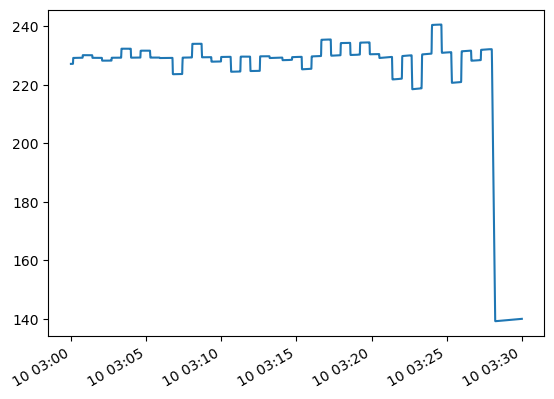

In [13]:
# plot the actual position
az['actualPosition'].plot()